# Working with Hugging Face - Part 3

## Building Pipelines for Image and Audio

In this chapter, you'll apply pipeline methodologies to new tasks using image and audio data. Specifically, you will learn ways to process these types of data in preparation for tasks such as classification, question and answering and automatic speech recognition.

### Processing image data
Just like text inputs, image inputs will typically require pre-processing before using with a pipeline for an image-based machine learning task, such as image classification. Some common transformations include cropping and resizing. Fortunately, Hugging Face provides modules for performing these steps via the image_transforms module in the transformers library.

Use this module to apply a transformation to a fashion image.

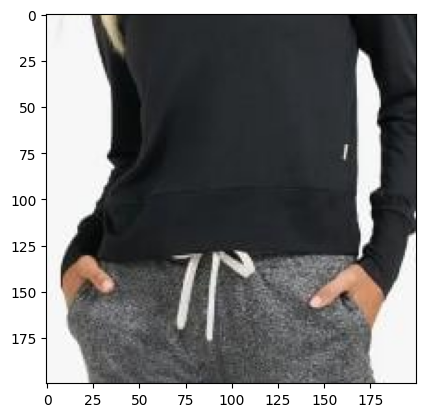

In [11]:
from PIL import Image
import numpy as np
from transformers import image_transforms
import matplotlib.pyplot as plt

original_image = Image.open('resources/fashion.jpeg')

# Create the numpy array
image_array = np.array(original_image)

# Crop the center of the image
cropped_array = image_transforms.center_crop(image=image_array, 
                                             size=(200, 200))

imgplot = plt.imshow(cropped_array)
plt.show()

### Creating an image classifier
Image classification is the process of labeling an image based on the content. This is useful for many reasons from improving search to saving agriculture crops from disease. It is also helpful for identifying clothing items in fashion photos.

Build an image classification pipeline using a model trained on identifying clothing items to classify the image you just cropped.

Both pipeline from the transformers library and the image, saved as cropped_image, have already been loaded for you.

In [12]:
from transformers import pipeline

# Create the pipeline
image_classifier = pipeline(task="image-classification", 
                            model="abhishek/autotrain_fashion_mnist_vit_base")

cropped_image = Image.fromarray(cropped_array)

# Predict the class of the image
results = image_classifier(cropped_image)

# Print the results
print(results[0]["label"])

Pullover


### What about the original image?
Now that you have the label for the cropped image, let's also classify the original image. Did transforming the image before classifying it impact the results at all?

The image is saved as original_image. Using the classifier built from the previous exercise, image_classifier, predict the label.

What is the label of the original image?

In [13]:
results = image_classifier(original_image)

# Print the results
print(results[0]["label"])

Trouser


### Document question and answering
Document question and answering is a multi-modal ML task which analyzes an image of a document, such as a contract, converts it to text, and allows a question to be asked about the text. This is useful when there are many scanned documents which need to be searched, for example financial records.

Build a pipeline for document question and answering, then ask the pre-loaded question Which meeting is this document about?.

pipeline from the transformers library and the question are already loaded for you. Note that we are using our own pipeline and dqa functions to enable you to learn how to use these functions without some of the extra setup. Please visit the Hugging Face documentation to dive deeper.

In [ ]:
from transformers import pipeline

# Create the pipeline
dqa = pipeline(task="document-question-answering", 
               model="naver-clova-ix/donut-base-finetuned-docvqa")

# Set the image and question
image = "resources/document.png"
question = "Which meeting is this document about?"

# Get the answer
results = dqa(image=image, 
              question=question)

print(results)

### Visual question and answering
Visual question and answering is an ML task that attempts to provide the best answer for a question about an image. The model will analyze the content of the image and return a label as the answer.

For example, if asking about the clothes a model is wearing, the model may return clothing items as the label. Such a task can be beneficial for people who are visually impaired or as a classification method (similar to image classification but more open-ended).

pipeline from the transformers library and both the question and image are already loaded for you.

In [2]:
from transformers import pipeline

# Create pipeline
vqa = pipeline(task="visual-question-answering", 
               model="dandelin/vilt-b32-finetuned-vqa")

image = "https://assets.datacamp.com/production/repositories/6536/datasets/ad0983f1eb5e12cb91ef28d6edb1d402bce745f2/jacob_original.jpeg"
question = "What is the model wearing in this image?"

# Use image and question in vqa
results = vqa(image=image, question=question)

print(results)

[{'score': 0.979570746421814, 'answer': 'hat'}, {'score': 0.5232059955596924, 'answer': 'beanie'}, {'score': 0.24782024323940277, 'answer': 'cap'}, {'score': 0.1803695410490036, 'answer': 'sweater'}, {'score': 0.021539444103837013, 'answer': 'hoodie'}]


### Resampling audio files
The sampling rate of an audio file determines the resolution. The higher the sampling rate, the higher the resolution which provides more detail about the sound wave itself.

When performing ML tasks it is important to ensure each file has the same sampling rate. This will maintain consistency and prepare the audio files based on what the model expects regarding number of data points per audio file.

The dataset, audio_file, and Audio from the datasets library are already loaded for you.

In [2]:
from datasets import load_dataset
from datasets import Audio

audio_file = load_dataset("mozilla-foundation/common_voice_17_0", "pl", split="test")

# Save the old sampling rate
old_sampling_rate = audio_file[1]["audio"]["sampling_rate"]

# Resample the audio files
audio_file = audio_file.cast_column("audio", Audio(sampling_rate=16000))

# Compare the old and new sampling rates
print("Old sampling rate:", old_sampling_rate)
print("New sampling rate:", audio_file[1]["audio"]["sampling_rate"])

Old sampling rate: 48000
New sampling rate: 16000


### Filtering out audio files
There will be occasions where you will want, or need, to filter a dataset based on a specific criteria. A common example of this is filtering for audio files that are under a specified duration.

The librosa and numpy libraries, as well as the dataset, have already been loaded for you. Note: we have modified the librosa library for the purposes of this exercise, but the functionality and pattern is the same.

In [8]:
import librosa
import numpy as np

# Create a list of durations
old_durations_list = []

# Loop over the dataset
for path in audio_file["path"]:
    old_durations_list.append(librosa.get_duration(path=path))

# Create a new column
audio_file = audio_file.add_column("duration", old_durations_list)

# Filter the dataset
filtered_dataset = audio_file.filter(lambda d: d < 6.0, input_columns=["duration"], keep_in_memory=True)

# Save new durations
new_durations_list = filtered_dataset["duration"]

print("Old duration:", np.mean(old_durations_list))
print("New duration:", np.mean(new_durations_list))

Filter:   0%|          | 0/9230 [00:00<?, ? examples/s]

Old duration: 5.11614450152533
New duration: 4.294090166686728


### Classifying audio files
Audio classification can be used for any task that requires labeling a piece of audio based on its content. A common use case is identifying spoken languages.

You will do just that using an example from the common_language dataset. The model, facebook/mms-lid-126 from Meta is a common model used for this task given its coverage of languages.

pipeline from the transformers library as well as the dataset have been loaded for you. It has been modified for the purposes of this exercise.

In [9]:
from transformers import pipeline

# Create the pipeline
classifier = pipeline(task="audio-classification", model="facebook/mms-lid-126")

# Extract the sample
audio = audio_file[1]["audio"]["array"]
sentence = audio_file[1]["sentence"]

# Predict the language
prediction = classifier(audio)

print(f"Predicted language is '{prediction[0]['label'].upper()}' for the sentence '{sentence}'")

Predicted language is 'BUL' for the sentence 'Gdzież tu powód do wyrzutów?'


### Instantiating an ASR pipeline
You've been tasked with generating text from a dataset of audio files. Accuracy is important, so you need to make sure you choose the best model for automatic speech recognition. You also don't have the time to train your own model.

Compare the predictions between the Wav2Vec and Whisper models by instantiating two pipelines for automatic speech recognition. You want to test out the functionality, so you should try it out on one example first.

pipeline from the transformers package is already loaded for you. Likewise, the dataset has already been loaded for you, resampled, and saved as english. One audio file with it's associated metadata is saved as example.

In [4]:
from transformers import pipeline

example = audio_file[1]

# Create an ASR pipeline using Meta's wav2vec model
meta_asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h")

# Predict the text from the example audio
meta_pred = meta_asr(example["audio"]["array"])["text"].lower()

# Repeat for OpenAI's Whisper model
open_asr = pipeline("automatic-speech-recognition", model = "openai/whisper-tiny")
open_pred = open_asr(example["audio"]["array"])["text"].lower()

# Print the prediction from both models
print("META:", meta_pred)
print("OPENAI:", open_pred)

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


META: jet the po berelubu
OPENAI:  dzież to pomoł do góżytu.


### Word error rate
The Wav2Vec and Whisper models predicted very similar text with only some minor differences. Luckily, for the first this example record, you have the true sentence for reference. You can use Word Error Rate (WER) to determine which model quantitatively performed the best.

load from the evaluate package has already loaded for you. Likewise, the example and predictions - meta_pred and open_pred - were saved from the previous exercise.

In [6]:
from evaluate import load

example = audio_file[1]

# Create the word error rate metric
wer = load("wer")

# Save the true sentence of the example
true_sentence = example["sentence"].lower()

# Compute the wer for each model prediction
meta_wer = wer.compute(predictions=[meta_pred], references=[true_sentence])
open_wer = wer.compute(predictions=[open_pred], references=[true_sentence])

print(f"The WER for the Meta model is {meta_wer} and for the OpenAI model is {open_wer}")

The WER for the Meta model is 1.0 and for the OpenAI model is 0.8


### Iterating over a dataset
You were able test the functionality and understand the performance on one example from the dataset. Now, let's evaluate the models over the first 100 audio files to make a final decision about which is best for this dataset.

In order to do this efficiently, you can create a function that will iterate over the rows of the dataset and yield a set of audio and true sentence pairs on each iteration.

The dataset, english, ASR models - meta_asr and open_asr - and pandas have all been loaded for you.

In [7]:
import pandas as pd

# Create the data function
def data(n=3):
    for i in range(n):
        yield audio_file[i]["audio"]["array"], audio_file[i]["sentence"].lower()
        
# Predict the text for the audio file with both models
output = []
for audio, sentence in data():
    meta_pred = meta_asr(audio)["text"].lower()
    open_pred = open_asr(audio)["text"].lower()
    # Append to the output list
    output.append({"sentence": sentence, "metaPred": meta_pred, "openPred": open_pred})

output_df = pd.DataFrame(output)

# Compute the WER for both models
metaWER = wer.compute(predictions=output_df["metaPred"], references=output_df["sentence"])
openWER = wer.compute(predictions=output_df["openPred"], references=output_df["sentence"])

# Print the WER
print(f"The WER for the meta model is {metaWER} and for the open model is {openWER}")

The WER for the meta model is 1.1875 and for the open model is 0.9375
